In [151]:
import cv2,os
import numpy as np

def crop_img(id, index):
    if not os.path.exists(f'images/{id}.jpg'):
        return []
    img = cv2.imread(f'images/{id}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     except:
#         return []
#     img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    W = 400
    H = 820

    sw=65
    rects = [
        (122, 7),
        (192, 7),
        (262, 7),
        (122, W-72),
        (192, W-72),
        (262, W-72),
    ]
    
    images = [[] for i in range(7)]
    pad = np.random.randint(1,5)
#     pxy = [(pad,-pad), (pad,pad), (-pad,pad), (-pad,-pad)]
    pxy = [(0,pad),(0,-pad),(pad,0),(pad,-pad), (pad,pad), (-pad,0), (-pad,pad), (-pad,-pad)]
    
    for i, (x,y) in enumerate(rects):
        for px,py in pxy:
#             px, py = pxy[np.random.randint(4)]
            img_crop = img[x+px:x+sw+px, y+py:y+sw+py]
            images[i].append(img_crop)
        
    cw = 100
    cx, cy = (H-cw)//2 + 10, (W-cw)//2
    pad = np.random.randint(1, 10)
    pxy = [(0,pad),(0,-pad),(pad,0),(pad,-pad), (pad,pad), (-pad,0), (-pad,pad), (-pad,-pad)]
    for px,py in pxy:
#         px, py = pxy[np.random.randint(4)]
        img_crop = img[cx+px:cx+cw+px, cy+py:cy+cw+py]
        img_crop = cv2.resize(img_crop, (sw, sw))
        images[6].append(img_crop)
    return images[index]

In [152]:
# !proxy pip install opencv-python
# !proxy pip install matplotlib

In [153]:
# np.random.uniform(low=0.9, high=1.1)

In [154]:
import os
import cv2
images, labels = [], []
for yy, folder in enumerate(os.listdir("label/")):
    folder = os.path.join("label", folder)
    print(yy, folder)
    for file in os.listdir(folder):
        if file[-3:]!="jpg": continue
        file = os.path.join(folder, file)
        image = cv2.imread(file)
#         print(file)

        DIR, name = os.path.split(file)
        raw_id, index = name.split(".")[0].split("_")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
        
        h,w = image.shape[:2]
        center = (w / 2, h / 2)
        if index=="6":
            for i, angle in enumerate([90, 180, 270]):
                scale = np.random.uniform(low=0.9, high=0.99)
                M = cv2.getRotationMatrix2D(center, angle, scale)
                new_img = cv2.warpAffine(image, M, (w, h))
                images.append(new_img)
                labels.append(yy)
                scale = np.random.uniform(low=1.01, high=1.1)
                M = cv2.getRotationMatrix2D(center, angle, scale)
                new_img = cv2.warpAffine(image, M, (w, h))
                images.append(new_img)
                labels.append(yy)
                M = cv2.getRotationMatrix2D(center, angle, 1)
                new_img = cv2.warpAffine(image, M, (w, h))
                images.append(new_img)
                labels.append(yy)
                
#         plt.imshow(image, cmap='gray')
#         plt.show()
        images.append(image)
        labels.append(yy)
        arg_images = crop_img(raw_id, int(index))
#         print(len(arg_images),raw_id, index)
        images += arg_images
        labels += [yy]*len(arg_images)
#         plt.imshow(arg_images[0], cmap='gray')
#         plt.show()

0 label/cheo
1 label/diacau
2 label/muiten
3 label/sach
4 label/tamgiac
5 label/tinnhan
6 label/trong


In [155]:
from collections import Counter
Counter(labels)

Counter({0: 1458, 1: 1853, 2: 1829, 3: 2044, 4: 1908, 5: 1377, 6: 873})

In [156]:
# image_crops = crop_img(983, 6)
# for image_crop in image_crops:
#     plt.imshow(image_crop, cmap='gray')
#     plt.show()

(11342, 65, 65)


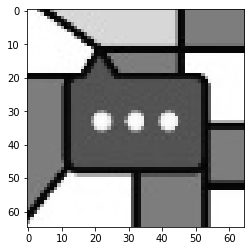

In [157]:
import numpy as np
import matplotlib.pyplot as plt
images = np.asarray(images)
print(images.shape)
images = images/255
labels = np.asarray(labels)
plt.imshow(X_train[27], cmap='gray')

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

In [168]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, Lambda, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


inputs = Input(shape=(65,65))

xx = Lambda(lambda x: tf.expand_dims(x,axis=-1))(inputs)
xx = Conv2D(filters=32, kernel_size=[5,5], activation='relu')(xx)
xx = MaxPooling2D(pool_size=(2,2))(xx)
xx = Conv2D(filters=32, kernel_size=[5,5], activation='relu')(xx)
xx = MaxPooling2D(pool_size=(2,2))(xx)
# xx = Conv2D(filters=32, kernel_size=[5,5], activation='relu')(xx)
# xx = MaxPooling2D(pool_size=(2,2))(xx)
xx = Flatten()(xx)
xx = Dense(units=100, activation='relu')(xx)
xx = Dropout(rate=0.5)(xx)
outputs = Dense(units=7, activation='softmax')(xx)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(0.005),
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 65, 65)]          0         
_________________________________________________________________
lambda_21 (Lambda)           (None, 65, 65, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 5408)              0  

In [169]:
from tensorflow.keras.callbacks import Callback
import tensorflow as tf

class CheckPoint(Callback):
    
    def __init__(self, early_stopping=5):
        self.best_top10 = 0.0
        self.n_no_improvements = 0
        self.early_stopping = early_stopping
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_acc'] > self.best_top10:
            self.best_top10 = logs['val_acc']
            self.best_params = self.model.get_weights()
            self.n_no_improvements = 0
        else:
            self.n_no_improvements += 1
            if self.n_no_improvements > self.early_stopping:
                self.model.stop_training = True
    def on_train_end(self,logs=None):
        print("Restoring from best checkpoint...")
        self.model.set_weights(self.best_params)

ckpt = CheckPoint()
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss', factor=0.5, patience=5, verbose=1, mode='auto',
    min_delta=0.0001, cooldown=0, min_lr=0.0001
)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=256, callbacks=[CheckPoint(early_stopping=20), reduce_lr], verbose=1)

Train on 9073 samples, validate on 2269 samples
Epoch 1/1000
9073/9073 [==============================] - 11s 1ms/sample - loss: 1.4984 - acc: 0.4209 - val_loss: 0.6806 - val_acc: 0.7920
Epoch 2/1000
9073/9073 [==============================] - 10s 1ms/sample - loss: 0.5844 - acc: 0.8081 - val_loss: 0.2707 - val_acc: 0.9123
Epoch 3/1000
9073/9073 [==============================] - 9s 1ms/sample - loss: 0.3193 - acc: 0.8924 - val_loss: 0.1851 - val_acc: 0.9396
Epoch 4/1000
9073/9073 [==============================] - 9s 992us/sample - loss: 0.2282 - acc: 0.9209 - val_loss: 0.1282 - val_acc: 0.9564
Epoch 5/1000
9073/9073 [==============================] - 9s 994us/sample - loss: 0.2056 - acc: 0.9252 - val_loss: 0.1448 - val_acc: 0.9550
Epoch 6/1000
9073/9073 [==============================] - 9s 976us/sample - loss: 0.1639 - acc: 0.9419 - val_loss: 0.0908 - val_acc: 0.9714
Epoch 7/1000
9073/9073 [==============================] - 9s 991us/sample - loss: 0.1175 - acc: 0.9602 - val_loss: 0

In [170]:
model.evaluate(X_test, y_test)

2269/2269 [==============================] - 1s 245us/sample - loss: 0.0126 - acc: 0.9978


[0.012583728401582804, 0.99779636]

In [171]:
preds = model.predict(X_test)
for i, (p, l) in enumerate(zip(preds.argmax(1), y_test)):
    if p!=l:
        print(i,p,l)
        break

20 5 4


(11342, 65, 65)


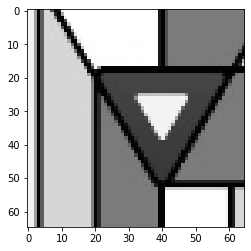

In [172]:
import numpy as np
import matplotlib.pyplot as plt
images = np.asarray(images)
print(images.shape)
images = images/255
labels = np.asarray(labels)
plt.imshow(X_test[20], cmap='gray')

In [173]:
model.save("model_v9.h5", include_optimizer=False)

In [90]:
20*5*sum(range(24))

27600

In [89]:
60/(22*5)

0.5454545454545454

In [91]:
1200/60

20.0